In [1]:
# project: p1
# submitter: Megan Kuo
# hours: ????

In [2]:
# import statements
import json
import copy
import os
import pandas as pd
import matplotlib.pyplot as plt
import subprocess
import time
import numpy as np

In [3]:
#Q1
type(8/3)

float

In [4]:
#Q2
x = 4
maximum = 15
minimum = 5
error = not (minimum<=x<=maximum) # False if x is inside the minimum-to-maximum range
error


True

In [5]:
#Q3
word = "QUOTIDIAN"
suffix_match = word[-len('IAN'):].lower() == 'IAN'.lower() # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match


True

In [6]:
def check_sum(x=0, y=0, sum=0):
    if x+y == sum:
        return True
    return False

In [7]:
#Q4
check_sum(0.1, 0.2, 0.3)

False

In [8]:
#Q5
check_sum(-1, 1)

True

In [9]:
#Q6
x = 4
if x%2==1:
    status = "odd"
elif x%2==0:
    status = "even"
else:
    status = "non-integer"
status


'even'

In [10]:
nums = [3, 4, 1, 6]
for x in nums:
    print(x)

3
4
1
6


In [11]:
def neg_sum(nums):
    total = 0
    for number in nums:
        if number>0:
            continue
        if total < -20:
            break
        total += number
    return total

In [12]:
#Q7
neg_sum(nums)

0

In [13]:
#Q8
neg_sum([-5, 1, -11, -6, 15, -1, 8, 2])

-22

In [14]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2, "z" : 4}
coord3 = {"x": 3, "y": 1, "z" : 7}

rows = [
    [1, 6, 7, 8, coord1],
    [3, 4, 9, coord2],
    [5, 2, coord3],
]

In [15]:
#Q9
coord3["w"] = 6
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 4, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [16]:
#Q10
rows[0][-1]['x']

8

In [17]:
#Q11
v2 = copy.copy(rows)
v2[0] = 404    # first change
v2[1][1] = 404 # second change
rows

[[1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}],
 [5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}]]

In [18]:
#Q12
column_b_index = header.index("B")
column_b_values = [row[column_b_index] for row in rows]
sum_b_column = sum(column_b_values)
sum_b_column

412

In [19]:
#Q13
def get_column_b(row):
    print("lookup B column for a row")
    return row[header.index("B")]

rows.sort(key=lambda row: row[header.index("B")])
rows



[[5, 2, {'x': 3, 'y': 1, 'z': 7, 'w': 6}],
 [1, 6, 7, 8, {'x': 8, 'y': 5}],
 [3, 404, 9, {'x': 9, 'y': 2, 'z': 4}]]

In [20]:
f = open("usd.json")
data = json.load(f)
f.close()
#print(type(data))
#print(data)


In [21]:
#Q14
exchange_rate_canada = data['cad']['rate']
cad_amount = round(1000 * exchange_rate_canada, 2)
cad_amount

1338.46

In [22]:
def divide(x, y):
    try:
        result = x/y
    except ZeroDivisionError:
        result = float("nan")
    return result

In [23]:
#Q15
divide(5, 2)

2.5

In [24]:
#Q16
divide(0, 0)

nan

In [25]:
directory_path = 'home-computers'
years = {}
for filename in os.listdir(directory_path):
    if filename.endswith(".csv"):
        year = int(filename.split('.')[0][-4:]) #find the year
        df = pd.read_csv(os.path.join(directory_path, filename), skiprows=1)
        df = df.set_index("Geographic Area Name")
        years[year] = df

In [26]:
#Q17
keys_in_years = [year for year in years]
keys_in_years.sort()
keys_in_years

[2017, 2018, 2019, 2020, 2021]

In [27]:
#Q18
df = years[2021]
df.loc['Wisconsin', 'Estimate!!Total'] 

2401818

In [28]:
#Q19
no_computer_2021 = df['Estimate!!Total!!No Computer'].sum()
no_computer_2021

8902093

In [29]:
#Q20
max_margin_of_error_fraction = (df['Margin of Error!!Total!!No Computer'] / df['Estimate!!Total!!No Computer']).max()
max_margin_of_error_fraction

0.07836701790752577

In [30]:
#Q21
percentage_without_compputer_dict = {}
target_states = ['Illinois', 'Indiana', 'Iowa', 'Michigan', 'Minnesota', 'Wisconsin']
targeted_states_df = df[df.index.isin(target_states)]
percentage_without_computer = round(targeted_states_df['Estimate!!Total!!No Computer']/targeted_states_df['Estimate!!Total']*100, 2)
percentage_without_computer_dict = {state: percentage_without_computer[state] for state in target_states}
percentage_without_computer_dict
    

{'Illinois': 7.35,
 'Indiana': 8.3,
 'Iowa': 8.3,
 'Michigan': 7.58,
 'Minnesota': 6.18,
 'Wisconsin': 8.03}

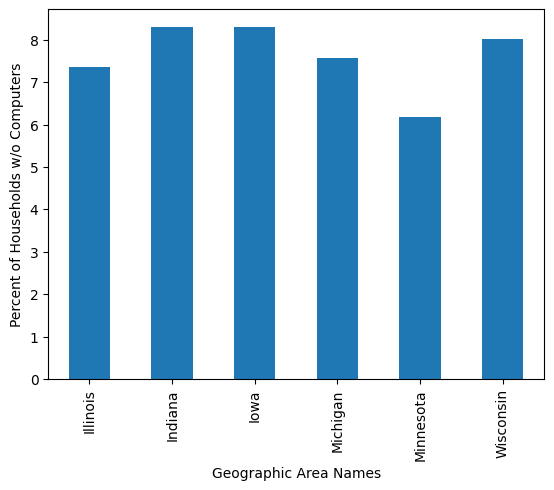

In [31]:
#Q22

result_series = pd.Series(percentage_without_computer_dict, dtype=float)
ax = result_series.plot.bar()
ax.set_xlabel('Geographic Area Names')
ax.set_ylabel('Percent of Households w/o Computers')
plt.show()


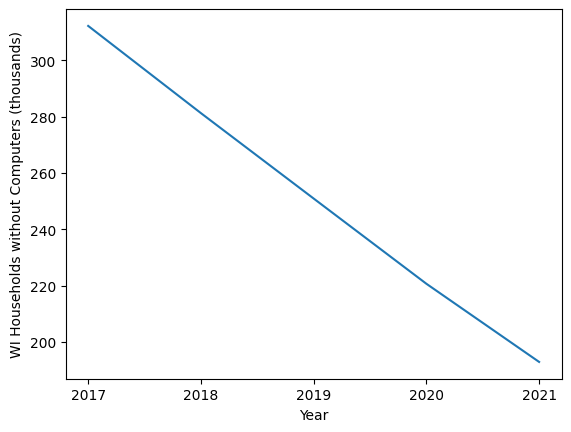

In [32]:
#Q23
custom_ticks = keys_in_years
wi_household_without_pc_series = pd.Series({
    year: years[year].loc['Wisconsin', 'Estimate!!Total!!No Computer']/1000
    for year in sorted(keys_in_years)
})
wi_household_without_pc_series.plot()
plt.xticks(custom_ticks)
plt.xlabel('Year') 
plt.ylabel('WI Households without Computers (thousands)') 
plt.show()



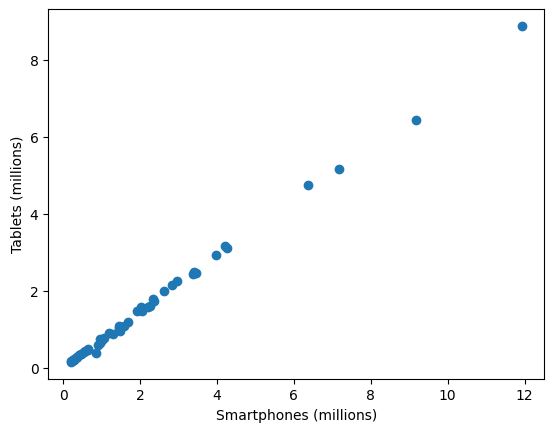

In [33]:
#Q24
smartphones_column = "Estimate!!Total!!Has one or more types of computing devices!!Smartphone"
tablets_column = "Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer"
plt.scatter(df[smartphones_column]/1e6, df[tablets_column]/1e6)
plt.xlabel("Smartphones (millions)")
plt.ylabel("Tablets (millions)")
plt.show()

In [34]:
#Q25
text = str(subprocess.check_output(["git", "log"], cwd = 'flask'))

lines = text.split("\\n")
commit_ids = []
for line in lines:
    if line.startswith("commit"):
        commit_id = line.split()[1] 
        commit_ids.append(commit_id)

first_line = lines[0][2:]
first_line

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [35]:
#Q26
last_ten_commit_ids = commit_ids[-10:]
last_ten_commit_ids

['a9d4ea81da28ee9c894bf9d45adc4cfa9d52fddc',
 '727c701686c18c4a27ca523eb0c5862d497be24e',
 '4edec48b74dbb9d571e927b69b24c30ec0624975',
 '625eba4bb403296a8bbc1e72cc9cf4a5126f6c02',
 '4aa76212d1be9b17a57249549c2a73fb10b6cda8',
 '3b36bef2e6165bb4dad73d17f23ee1879e99f497',
 '44b42e0fbd93d86e0f4e929bda8e5fb63e81035d',
 '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4',
 'b15ad394279fc3b7f998fa56857f334a7c0156f6',
 '33850c0ebd23ae615e6823993d441f46d80b1ff0']

In [36]:
#Q27
text = subprocess.check_output(["git", "checkout", commit_ids[-100]], cwd = 'flask', encoding = 'utf-8')

with open("flask/README", "r") as file:
   readme_content = file.read()
    
readme_content

Note: switching to 'f878919753a909e45b2d5448aa175f4f9129ff24'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at f8789197 With -> with in headline


"\n                          // Flask //\n\n         because sometimes a pocket knife is not enough\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n    ~ Is it ready?\n\n      A preview release is out now, and I'm hoping for some\n      input about what you want from a microframework and\n      how it should look like.  Consider the API to slightly\n      improve over time.\n\n    ~ What do I need?\n\n      Jinja 2.4 and Werkzeug 0.6.1.  `easy_install` will\n      install them for you if you do `easy_install Flask==dev`.\n      I encourage you to use a virtualenv.  Check the docs for\n      complete installation and usage instructions.\n\n    ~ Where are the docs?\n\n      Go to http://flask.pocoo.org/ for a prebuild version of\n      the current documentation.  Otherwise build them yourself\n      from the sphinx sources i

In [37]:
#Q28
text = str(subprocess.check_output(["git", "checkout", "main"], cwd = 'flask'))

git_log_lines = lines
username_counts = {}

for line in git_log_lines:
    try:
        if "Merge pull request" in line:
            username = line.split("Merge pull request #")[1].split("/")[0].split(" ")[2]
            
            if username in username_counts:
                username_counts[username] += 1
            else:
                username_counts[username] = 1
    except IndexError:
        continue

username_counts_filtered = {username: count for username, count in username_counts.items() if count >= 10}
username_counts_filtered
        

Previous HEAD position was f8789197 With -> with in headline
Switched to branch 'main'


{'pallets': 204,
 'pgjones': 14,
 'greyli': 42,
 'ThiefMaster': 11,
 'davidism': 45,
 'untitaker': 20,
 'ThomasWaldmann': 13,
 'SimonSapin': 11}

In [38]:
#Q29
try:
    msg = subprocess.check_output(["pip3", "instal"], stderr=subprocess.STDOUT)
except subprocess.CalledProcessError as e:
    msg = e.output
output = msg.decode('utf-8')
output

'ERROR: unknown command "instal" - maybe you meant "install"\n'

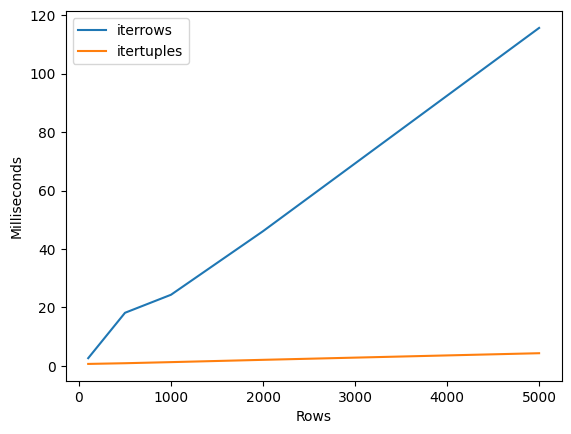

In [39]:
#Q30

def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 5)),
                        columns=["A", "B", "C", "D", "E"],
                        index=[f"r{i}" for i in range(1, rows+1)])

def measure_iterrows(rows):
    df = rand_df(rows)
    t0 = time.time()
    for row in df.iterrows():
        pass
    t1 = time.time()
    return (t1 - t0) * 1000  # Convert to milliseconds

def measure_itertuples(rows):
    df = rand_df(rows)
    t0 = time.time()
    for row in df.itertuples():
        pass
    t1 = time.time()
    return (t1 - t0) * 1000 

sizes = [100, 500, 1000, 2000, 5000]
data = {'iterrows': [], 'itertuples': []}

for size in sizes:
    data['iterrows'].append(measure_iterrows(size))
    data['itertuples'].append(measure_itertuples(size))

times_df = pd.DataFrame(data, index=sizes)

times_df.plot.line()
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.show()

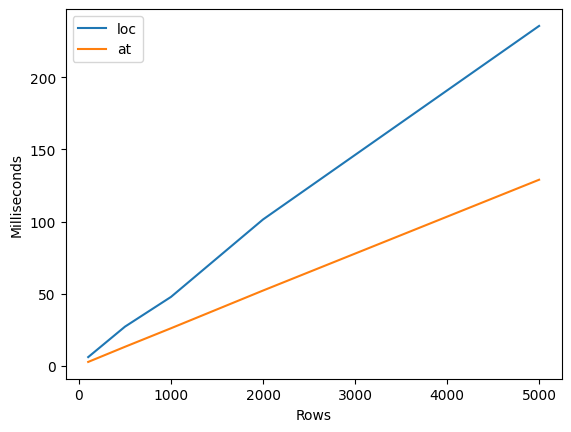

In [40]:
#Q31
def measure_loc(df):
    total = 0
    t0 = time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.loc[idx, col]
    t1 = time.time()
    return (t1 - t0) * 1000 

def measure_at(df):
    total = 0
    t0 = time.time()
    for idx in df.index:
        for col in df.columns:
            total += df.at[idx, col]
    t1 = time.time()
    return (t1 - t0) * 1000 

sizes = [100, 500, 1000, 2000, 5000]
data = {'loc': [], 'at': []}

for size in sizes:
    df = rand_df(size)
    data['loc'].append(measure_loc(df))
    data['at'].append(measure_at(df))

times_df = pd.DataFrame(data, index=sizes)

times_df.plot.line()
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.show()

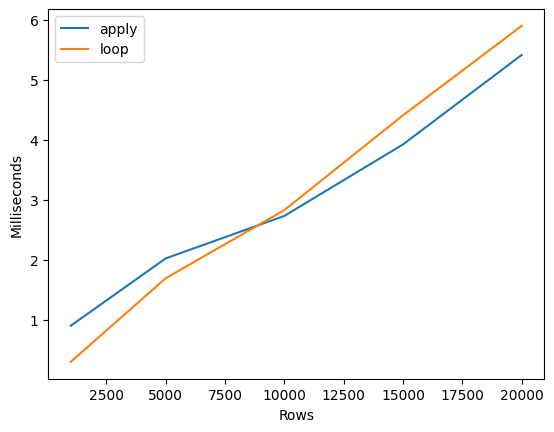

In [41]:
#Q32
def apply_laugh(df):
    t0 = time.time()
    result = df["A"].apply(laugh).tolist()
    t1 = time.time()
    return (t1 - t0) * 1000  

def loop_laugh(df):
    t0 = time.time()
    result = []
    for val in df["A"]:
        result.append(laugh(val))
    t1 = time.time()
    return (t1 - t0) * 1000

def laugh(x):
    return "qwerty" * x

sizes = [1000, 5000, 10000, 15000, 20000]
data = {'apply': [], 'loop': []}

for size in sizes:
    df = rand_df(size)
    data['apply'].append(apply_laugh(df))
    data['loop'].append(loop_laugh(df))

times_df = pd.DataFrame(data, index=sizes)

times_df.plot.line()
plt.xlabel('Rows')
plt.ylabel('Milliseconds')
plt.show()
